<a href="https://colab.research.google.com/github/alamin19/GPU_Research/blob/main/research_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Data Exploration and Preparation

We'll start by downloading the CIFAR-10 dataset from Keras.



#### Loading data into local variables

In [ ]:
from keras.datasets import cifar10

# Fetch the data:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


####  Import needed functions and libraries

In [ ]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation, MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  

#### Data Preparation & Exploration

Let's take a look at a few of these images. Rerun this cell multiple times to see different images for each class.

You may notice that these images look low fidelity, which is because they are! As we increase our image size, we also increase our model complexity. What's important is that our classes are still distinguishable from each other.

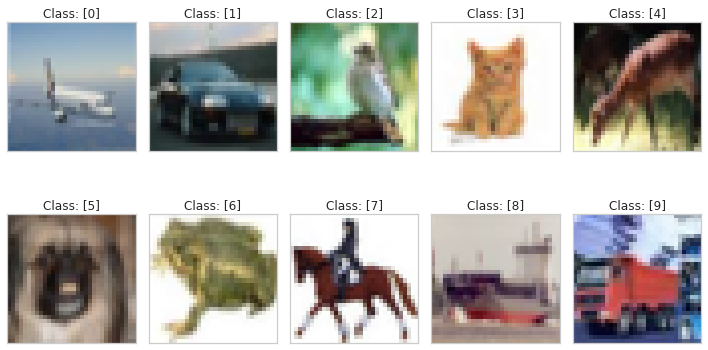

In [ ]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 6)

for i in range(2):
    for j in range(5):
        c = j + 5*i # Class counter
        l = np.random.choice(np.where(y_train == c)[0], 1)[0] # Get a random image from class c
        ax[i, j].imshow(X_train[l])
        ax[i, j].set_title('Class: ' + str(y_train[l]))
        # Hide grid lines
        ax[i, j].grid(False)
        # Hide axes ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        
plt.tight_layout()

#### Let's take a look at the format of our data

In [ ]:
print('X (images)', X_train.shape)
print('y (classes)', y_train.shape)

X (images) (50000, 32, 32, 3)
y (classes) (50000, 1)


In [ ]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

We can see that we have 50,000 samples, where each images is 32 by 32 pixels with 3 color channels: RGB.

For each of these images, we have a single label for which class they each belong to.

#### One hot encode the labels, and normalize the data


In [ ]:
# One-hot encode those integer values of class labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

# Normalize all entries to the interval [0, 1]
X_train /= 255
X_test /= 255

In [ ]:
import time
import keras

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'],)

In [ ]:
time_callback = TimeHistory()

history = model.fit(X_train, y_train, batch_size=128, epochs=20,callbacks= time_callback, validation_data=(X_test, y_test))
time = time_callback.times

Epoch 1/20
391/391 [==============================] - 331s 848ms/step - loss: 1.8762 - accuracy: 0.2748 - val_loss: 1.4084 - val_accuracy: 0.4735
Epoch 2/20
391/391 [==============================] - 324s 829ms/step - loss: 1.3201 - accuracy: 0.5189 - val_loss: 1.0552 - val_accuracy: 0.6232
Epoch 3/20
391/391 [==============================] - 326s 833ms/step - loss: 1.1108 - accuracy: 0.6045 - val_loss: 0.9544 - val_accuracy: 0.6606
Epoch 4/20
391/391 [==============================] - 325s 832ms/step - loss: 0.9821 - accuracy: 0.6552 - val_loss: 0.8279 - val_accuracy: 0.7124
Epoch 5/20
391/391 [==============================] - 325s 831ms/step - loss: 0.8945 - accuracy: 0.6875 - val_loss: 0.8362 - val_accuracy: 0.7079
Epoch 6/20
391/391 [==============================] - 326s 833ms/step - loss: 0.8309 - accuracy: 0.7092 - val_loss: 0.7391 - val_accuracy: 0.7436
Epoch 7/20
391/391 [==============================] - 324s 828ms/step - loss: 0.7905 - accuracy: 0.7256 - val_loss: 0.7183 -

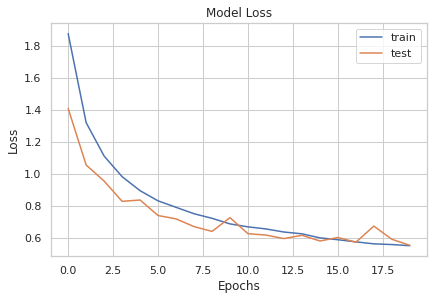

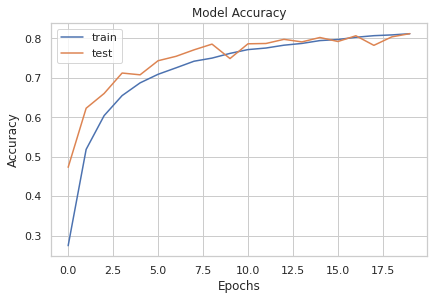

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
print(time)

[333.5357758998871, 325.1199526786804, 326.4075586795807, 326.2830002307892, 325.8716490268707, 326.35038113594055, 324.687602519989, 327.2744450569153, 327.16722774505615, 329.1941661834717, 328.60005593299866, 328.8882348537445, 327.59219121932983, 327.83914613723755, 327.26917552948, 326.30924248695374, 326.54705810546875, 326.83149790763855, 327.65786838531494, 328.45025849342346]


In [ ]:
import pandas as pd


df = pd.DataFrame()


df["Model1"]=time

df['Model1 Accuracy'] = history.history['accuracy']

In [ ]:
df.to_csv("result.csv")

In [ ]:
df['Model1'].mean()

327.3938244104385

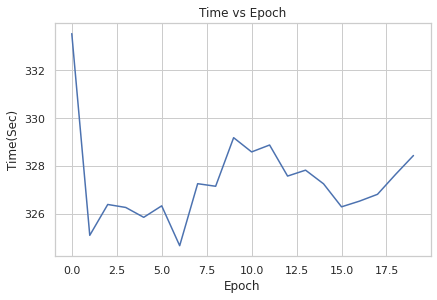

In [ ]:
df['Model1'].plot.line()
plt.xlabel("Epoch")
plt.ylabel("Time(Sec)")
plt.title("Time vs Epoch")
plt.show()

Now that's better, about 80% accuracy on the train set, but only about 62% accuracy on the validation set (though each time this is run, a different result is obtained, so your results may vary), and with fewer epochs and trainable parameters than a network from scratch (such as Question 1). And we didn't need to add much to the output of our pretrained VGG16 network.

Do notice that we are heavily overfitting though.


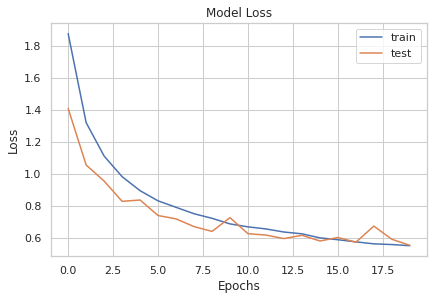

KeyError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()